In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#from pandas_profiling import ProfileReport

# Loading Dataset

In [6]:
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

d:\Usama\DriveShare\Self Learning\House Price Prediction\BostonHousePricePrediction\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

 

In [8]:
type(boston)

sklearn.utils.Bunch

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
# Let's check the description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Preparing the Dataset

In [13]:
dataset = pd.DataFrame(boston.data,  columns=boston.feature_names)

In [14]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#Adding target column in Dataframe
dataset["Price"] = boston.target

In [16]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

In [17]:
# Checking general info of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
#Observations:
#Type of Data and Mising Value Check.
"""
1. There is no Qualitative (Categorical) Data and only Quantitative Data (Numerical).
2. There are no missing values.
"""

'\n1. There is no Qualitative (Categorical) Data and only Quantitative Data (Numerical).\n2. There are no missing values.\n'

In [19]:
# Checking basic statistics of Data.
# It will only take Numerical Data and not Categorical Data
# To check the statistics of Categorical Data we have to use Encoding Techniques
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
# Checking detialed statistics of Data using Pandas Profiling.
pf = ProfileReport(dataset)
pf.to_widgets()

NameError: name 'ProfileReport' is not defined

### 1. Checking Missing Values:

In [21]:
dataset.isnull().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Here we can see there are no missing values so no need of handling 
# missing values.
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### 2. Feature Selection
#### 2.1 Checking Correlation
##### Our data has multivariate features

In [23]:
# There are 2 types of correlation:
# (i) Between Dependent features, and
# (ii) Between Dependent and Independent feature. 
# If there's high correlation between 2 independent feature means Multicollinearity 
# then in that case, we can remove one of them.
# Range of correlation ranges -1 to 1
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [24]:
# Visualizing correlation among all features
import seaborn as sns
sns.pairplot(dataset)

ModuleNotFoundError: No module named 'seaborn'

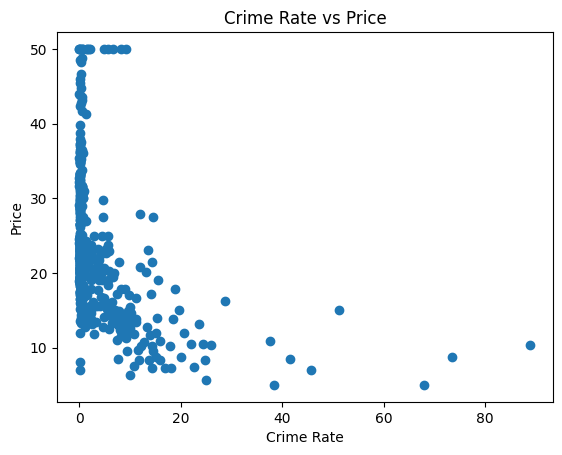

In [25]:
# Visualizing correlation between InDependant and Dependant feature
plt.scatter(dataset["CRIM"], dataset["Price"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.title("Crime Rate vs Price")
plt.show()

In [26]:
#Visualizing plot with Linear Regression Line using seaborn
sns.regplot(x="RM",y="Price", data=dataset)

NameError: name 'sns' is not defined

In [27]:
"""
Likewise we can check the Regression plot of Dependant Feature
with other Independant features.
Note: If we are about to create Regression model, then in that case
      it is important to check that there must be linearity to create
      Linear Regression Model and if this relation is not there, then
      in that case Linear Regression model might not perform better
      than other Regression models.      
"""

'\nLikewise we can check the Regression plot of Dependant Feature\nwith other Independant features.\nNote: If we are about to create Regression model, then in that case\n      it is important to check that there must be linearity to create\n      Linear Regression Model and if this relation is not there, then\n      in that case Linear Regression model might not perform better\n      than other Regression models.      \n'

# Preparing Data for Training

In [28]:
# Indepedent and Dependent Features
X = dataset.iloc[:,:-1] # All columns except last
y = dataset.iloc[:,-1] # We will get series incase of single column
# Double bracket incase of gettign datframe instead of series for single column
# y = dataset.iloc[:,[-1]] 

In [29]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [31]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=123)

In [32]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


In [33]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
85,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2.63548,0.0,9.90,0.0,0.5440,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
91,0.03932,0.0,3.41,0.0,0.4890,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20
151,1.49632,0.0,19.58,0.0,0.8710,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
426,12.24720,0.0,18.10,0.0,0.5840,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69


# Standardize the dataset
#### Note : Normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution. Normalization scales in a range of [0,1] or [-1,1]. Standardization is not bounded by range. Normalization is highly affected by outliers. If your dataset has extremely high or low values (outliers) then standardization is more preferred because usually, normalization will compress these values into a small range.

In [34]:
"""
fit() : It is used for calculating the initial parameters μ(mean) and σ(standard deviation) 
on the training data and later saves them as internal objects state. It is black box which 
only does the computation and gives nothing.

transform() : Use the initial above calculated values and return modified training data
as output.

fit_transform() : It is a conglomerate above two steps. Internally, it first calls fit()
and then transform() on the same data. It joins the fit() and transform() method for the
transformation of the dataset.
"""

'\nfit() : It is used for calculating the initial parameters μ(mean) and σ(standard deviation) \non the training data and later saves them as internal objects state. It is black box which \nonly does the computation and gives nothing.\n\ntransform() : Use the initial above calculated values and return modified training data\nas output.\n\nfit_transform() : It is a conglomerate above two steps. Internally, it first calls fit()\nand then transform() on the same data. It joins the fit() and transform() method for the\ntransformation of the dataset.\n'

In [35]:
# This scaling step of X data we can do either before or after the the train test split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # only transform is use as the fit is already used above 

In [36]:
# Saving pickle file which will be use to scale any new data
import pickle
pickle.dump(scaler,open("scaling.pkl","wb"))

In [122]:
X_train, X_test

array([[-0.35842932,  0.37320621, -0.57528914, ...,  0.07439155,
         0.3453823 , -0.83365402],
       [-0.37674054,  0.41676539, -0.76854658, ..., -0.77056919,
         0.41521182, -1.01390057],
       [-0.37507786, -0.49797742, -1.23412134, ..., -0.30114655,
         0.41521182, -0.43572509],
       ...,
       [-0.34436402, -0.49797742, -0.51379813, ...,  0.54381419,
         0.41521182, -0.67836468],
       [ 0.61710364, -0.49797742,  1.05568658, ...,  0.82546777,
         0.41521182,  1.52618932],
       [ 0.11316957, -0.49797742,  1.05568658, ...,  0.82546777,
        -0.06550689, -0.75878238]])

# Model Training

In [124]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

In [125]:
# Fit the data using Linear regression to compute the parameters
l_reg.fit(X_train,y_train)

LinearRegression()

In [126]:
# print the parameter learnt by Linear Regression - coefficient
# Here showing parameters for every independent feature
# y =mx + c; where c represent intercept and m represent coefficient, and
#                  x represent independent and y represent dependent variable
print(l_reg.coef_)

[-0.9281326   0.91733243  0.51483834  0.062497   -1.6306264   3.42029822
 -0.2106865  -2.81921261  2.3080726  -2.16656895 -2.03787778  0.5639928
 -3.50931538] 22.761864406779665


In [127]:
# print the parameter learnt by Linear Regression - intercept
print(l_reg.intercept_)

22.761864406779665


In [128]:
# checking the parameters on which model has been trained
l_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# Model Prediction

In [129]:
y_pred = l_reg.predict(X_test)
y_pred

array([15.4757088 , 27.85786595, 39.71821366, 17.94591734, 30.19441873,
       37.51057831, 25.20492485, 11.29301795, 13.93325033, 32.10798674,
       28.51346127, 19.10242965, 14.16909335, 30.59883198, 16.91765089,
       21.57521646, 20.56956106, 38.0388848 , 18.28489886, 15.44455502,
       13.942728  , 22.89202676, 33.08289616, 38.85747118, 29.91747968,
       22.34030137, 17.88075723, 20.6598468 , 23.37690089, 20.51319684,
       25.78620928, 33.83339852, 15.33132641, 21.79161378, 24.14376798,
       35.2106862 , 29.20302521, 18.566505  , 13.9622867 , 38.63492008,
       31.18122326, 19.10959362, 19.1273964 , 39.74779582,  8.86534866,
       27.28051165, 19.04476095, 25.44873252, 15.50076478, 26.17581245,
       33.69571146, 24.40124874, 19.39414746, 12.55330545, 24.50462883,
       18.21889479, 10.63052092,  2.28680811, 31.72266364, 13.46355579,
       20.09462113, 22.38725561, 19.98251601, 17.86587813, 24.34154548,
       26.93269765, 25.82034717, 22.2255162 , 24.67832008, 30.36

# Visualizing results

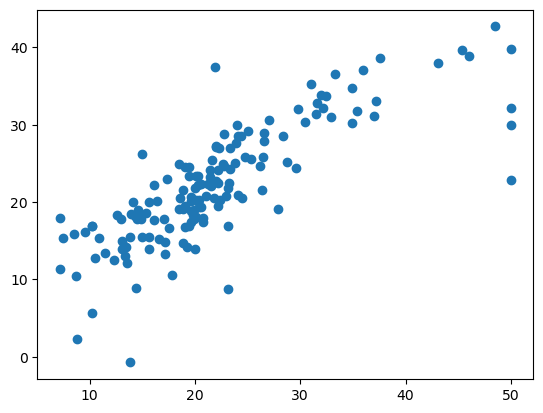

In [130]:
# Plot a scatterplot for the y_pred and y_test to compare

# We can see that plot shows both values are almost linear, that
# means model is predicting well.
plt.scatter(y_test, y_pred)

In [132]:
# Checking residuals(errors) i.e y_test-y_pred
residuals = y_test-y_pred
residuals

410   -0.475709
85    -1.257866
280    5.681786
422    2.854083
199    4.705581
         ...   
310   -1.599390
91    -5.061577
151    0.740793
426   -6.727166
472    0.729488
Name: Price, Length: 152, dtype: float64

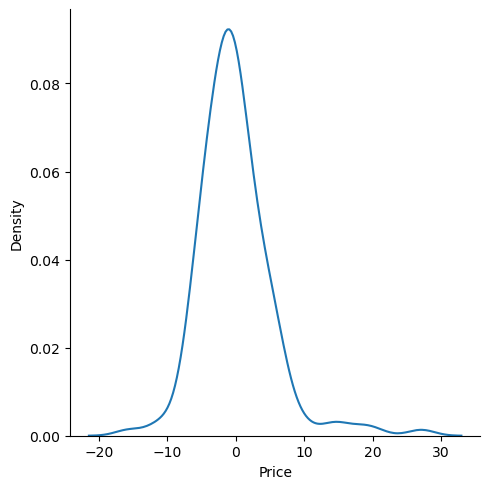

In [135]:
# Plotting the residuals"
# We can see that this plot looks like normally distributed but on
# the right hand side, there are some outliers but most of the data 
# is normally distributed
sns.displot(residuals, kind="kde")

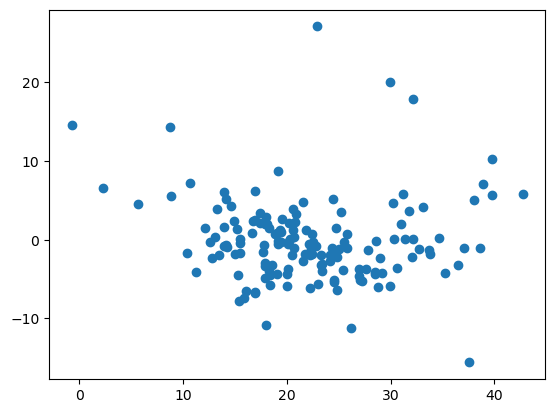

In [136]:
# Scatter plot with respect to prediction and residuals
# Residuals must be uniformly distributed

"""
Here we can see that residuals are uniformly distributed and
not showing any pattern.
Since residual positive values for the residual (on the y-axis) mean
the prediction was too low, and negative values mean the prediction 
was too high; 0 means the guess was exactly correct.
So, if residualas are normally distributed this means model is good.
If the model showls some pattern, this means there is some room for 
improvement.
"""
plt.scatter(y_pred, residuals)

# Checking Metrics

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("mae: ",mean_absolute_error(y_test,y_pred))
print("mse: ",mean_squared_error(y_test,y_pred))
print("rmse: ",np.sqrt(mean_squared_error(y_test,y_pred)))


mae:  3.691362677116256
mse:  28.405854810508224
rmse:  5.329714327288867
r2:  0.6485645742370705


In [140]:
# R-squared
# Ranges 0 to 1
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("r2: ",score)

r2:  0.6485645742370705


Adjusted R2 = 1 - {1-R2)*(n-1)/(n-k-1)}
where, n : the number of observations; 
       k: the number of predictor variable

In [142]:
# Adjusted R-Squared
# Adjusted R_squared is slighlty less than Rsquared
adj_r = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r

0.6154583384767944

# Testing the Model using New Data

#### 1. Data Preparation before using it for Prediction (Data should be in same format as it was given during Training)
##### Shape Check

In [146]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [143]:
# Let's see single data, we can see that we have it in 1 dimension.
# But during training we have trained 2 dimensioned data.
boston.data[0].shape

(13,)

In [145]:
# Let's reshape the single dimension data to two dimesnionadata 
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [147]:
boston.data[0].reshape(1,-1).shape

(1, 13)

##### Standardization

In [149]:
# Scaled data is required if it was scaled during Training.
scaled_data = scaler.transform(boston.data[0].reshape(1,-1))
scaled_data

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.38188527,  0.28608784, -1.25608241, -0.2511236 , -0.10590692,
         0.36860045, -0.0869086 ,  0.11122296, -0.97340113, -0.63547727,
        -1.47470314,  0.41521182, -1.05549593]])

In [150]:
l_reg.predict(scaled_data)

array([29.92816998])

# Saving the model using pickel 
#### This model will be used while deploying

In [151]:
import pickle

In [154]:
# Saving the model in pickle format
pickle.dump(l_reg, open("regmodel.pkl", "wb"))

# Loading the model 

In [156]:
# Loading the saved pickled model
pickled_model = pickle.load(open("regmodel.pkl", "rb"))

In [157]:
# Predicting using the model
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.92816998])